In [1]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [2]:
common_config.figure_journal_basic()

In [12]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pkl

In [13]:
adata = sc.read_h5ad("data/zhang_preprocessed.h5ad")
adata

AnnData object with n_obs × n_vars = 146358 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'Timepoint', 'Celltype'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Celltype_colors', 'Group_colors', 'Treatment_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

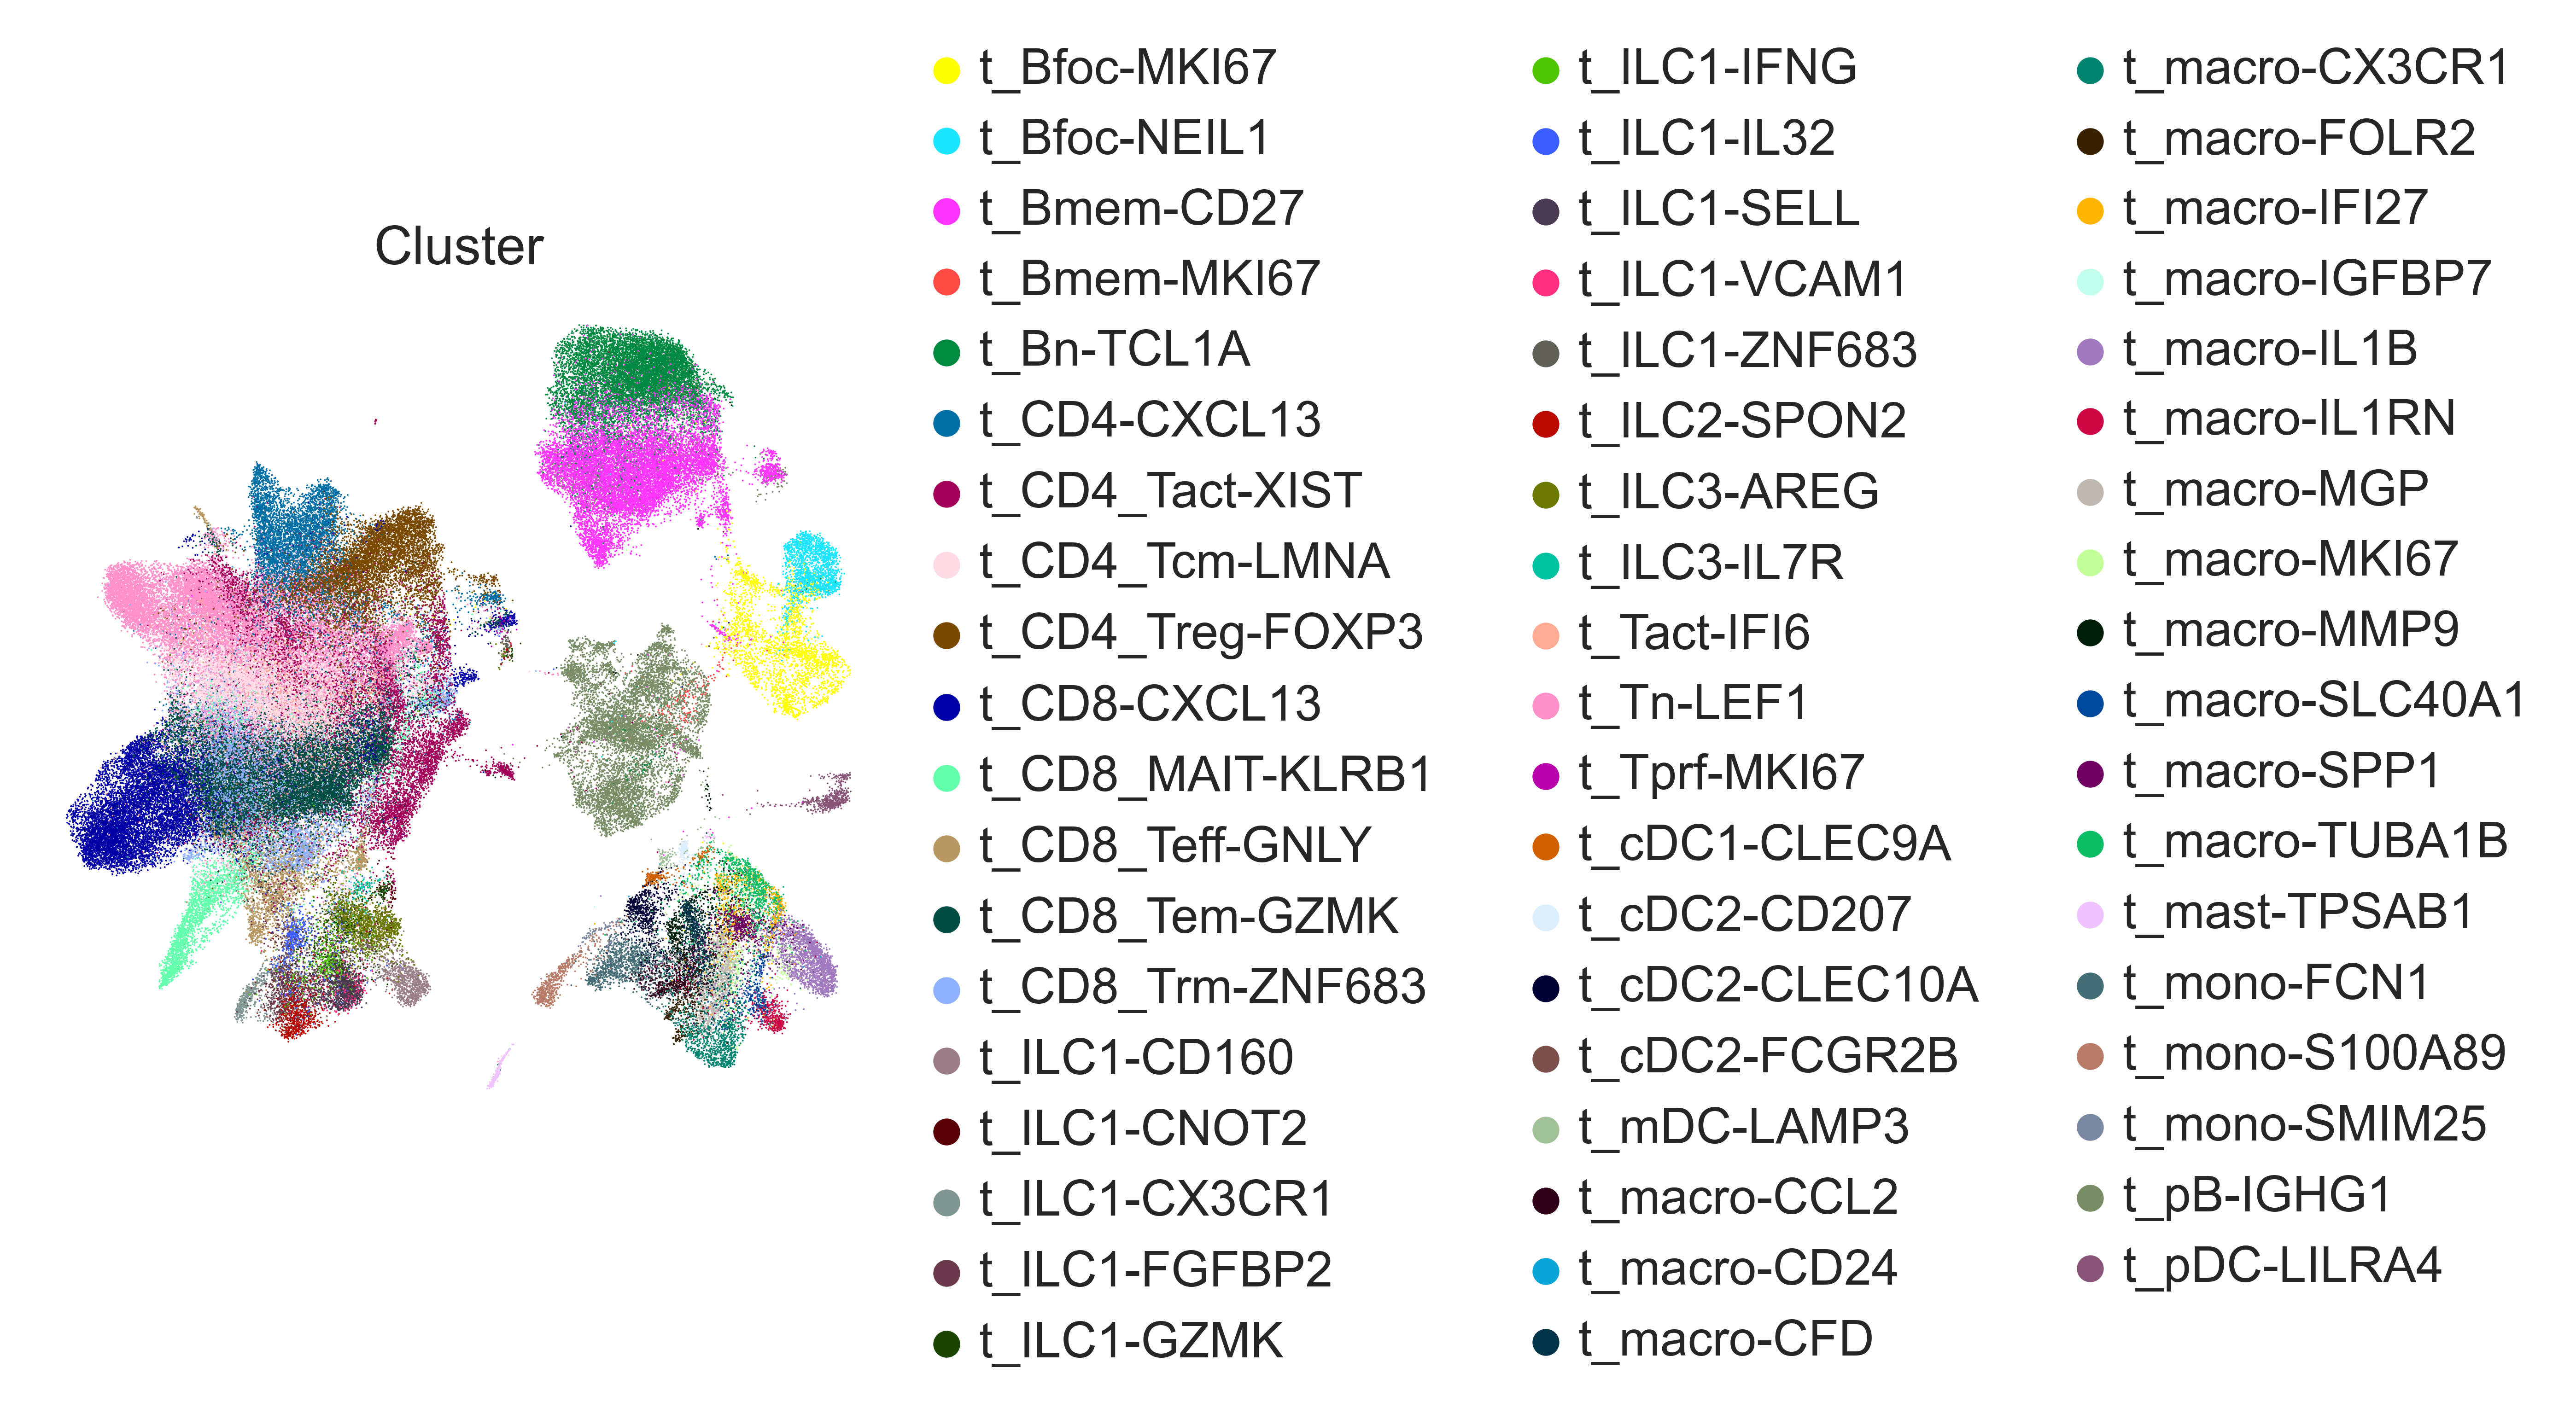

In [14]:
sc.pl.umap(adata, color="Cluster")

In [4]:
with open("dialogue_output/dialogue_lp.pkl", "rb") as file:
    dlg_lp_results = pkl.load(file)

In [6]:
dlg_lp_results.keys()

dict_keys(['mcps', 'ws', 'ct_subs', 'pvals', 'pvals_adj', 'tstats'])

In [11]:
dlg_lp_results["pvals"]

mcp_0     mcp_1     mcp_2     mcp_3     mcp_4     mcp_5  \
t_Bmem-CD27       0.531161  0.030446  0.754414  0.991191  0.085004  0.467755   
t_CD4_Tcm-LMNA    0.184374  0.040579  0.675824  0.361232  0.234386  0.494144   
t_CD4_Treg-FOXP3  0.333307  0.052414  0.476665  0.759266  0.146527  0.276156   
t_CD8_MAIT-KLRB1  0.268220  0.134365  0.467740  0.517327  0.146539  0.742260   
t_CD8_Tem-GZMK    0.324291  0.086741  0.721219  0.578270  0.482838  0.665149   
t_CD8_Trm-ZNF683  0.198660  0.139209  0.772544  0.357908  0.682394  0.179008   
t_Tn-LEF1         0.167366  0.016421  0.889154  0.306698  0.079136  0.086825   
t_mono-FCN1       0.839205  0.079001  0.735492  0.364328  0.614472  0.121974   
t_pB-IGHG1        0.924011  0.056829  0.951586  0.965226  0.043165  0.788082   

                     mcp_6     mcp_7     mcp_8     mcp_9  
t_Bmem-CD27       0.936740  0.672419  0.392860  0.749550  
t_CD4_Tcm-LMNA    0.318854  0.410845  0.531756  0.064516  
t_CD4_Treg-FOXP3  0.863869  0.958941  0.797666  0.232890  
t_CD8_MAIT-KLRB1  0.480628  0.547633  0.771029  0.771413  
t_CD8_Tem-GZMK    0.957758  0.423797  0.770964  0.772365  
t_CD8_Trm-ZNF683  0.323091  0.289422  0.382797  0.103137  
t_Tn-LEF1         0.127403  0.216592  0.661517  0.039882  
t_mono-FCN1       0.624906  0.796627  0.999093  0.124652  
t_pB-IGHG1        0.749254  0.421545  0.951339  0.519105

In [7]:
dlg_lp_results["pvals_adj"]

mcp_0     mcp_1     mcp_2     mcp_3     mcp_4     mcp_5  \
t_Bmem-CD27       0.682922  0.102293  0.951586  0.991191  0.255011  0.741217   
t_CD4_Tcm-LMNA    0.499961  0.102293  0.951586  0.819737  0.351579  0.741217   
t_CD4_Treg-FOXP3  0.499961  0.102293  0.951586  0.976199  0.263770  0.621352   
t_CD8_MAIT-KLRB1  0.499961  0.139209  0.951586  0.867405  0.263770  0.788082   
t_CD8_Tem-GZMK    0.499961  0.111524  0.951586  0.867405  0.620792  0.788082   
t_CD8_Trm-ZNF683  0.499961  0.139209  0.951586  0.819737  0.682394  0.537025   
t_Tn-LEF1         0.499961  0.102293  0.951586  0.819737  0.255011  0.537025   
t_mono-FCN1       0.924011  0.111524  0.951586  0.819737  0.682394  0.537025   
t_pB-IGHG1        0.924011  0.102293  0.951586  0.991191  0.255011  0.788082   

                     mcp_6     mcp_7     mcp_8     mcp_9  
t_Bmem-CD27       0.957758  0.864539  0.999093  0.772365  
t_CD4_Tcm-LMNA    0.957758  0.762835  0.999093  0.280466  
t_CD4_Treg-FOXP3  0.957758  0.958941  0.999093  0.419202  
t_CD8_MAIT-KLRB1  0.957758  0.821450  0.999093  0.772365  
t_CD8_Tem-GZMK    0.957758  0.762835  0.999093  0.772365  
t_CD8_Trm-ZNF683  0.957758  0.762835  0.999093  0.280466  
t_Tn-LEF1         0.957758  0.762835  0.999093  0.280466  
t_mono-FCN1       0.957758  0.896206  0.999093  0.280466  
t_pB-IGHG1        0.957758  0.762835  0.999093  0.772365

In [16]:
associations_df = dlg_lp_results["pvals_adj"]
#significant_cell_types = [ct for ct in associations_df.index if any(associations_df.loc[ct] < 0.05)]
#associations_df = associations_df.loc[significant_cell_types]
#associations_df

In [17]:
adata = ad.read_h5ad("dialogue_output/dialogue_lp.h5ad")
adata

AnnData object with n_obs × n_vars = 42550 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'n_counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9'
    obsm: 'X_pca', 'X_umap'

In [ ]:
associations_df = #TODO

## Dotplot

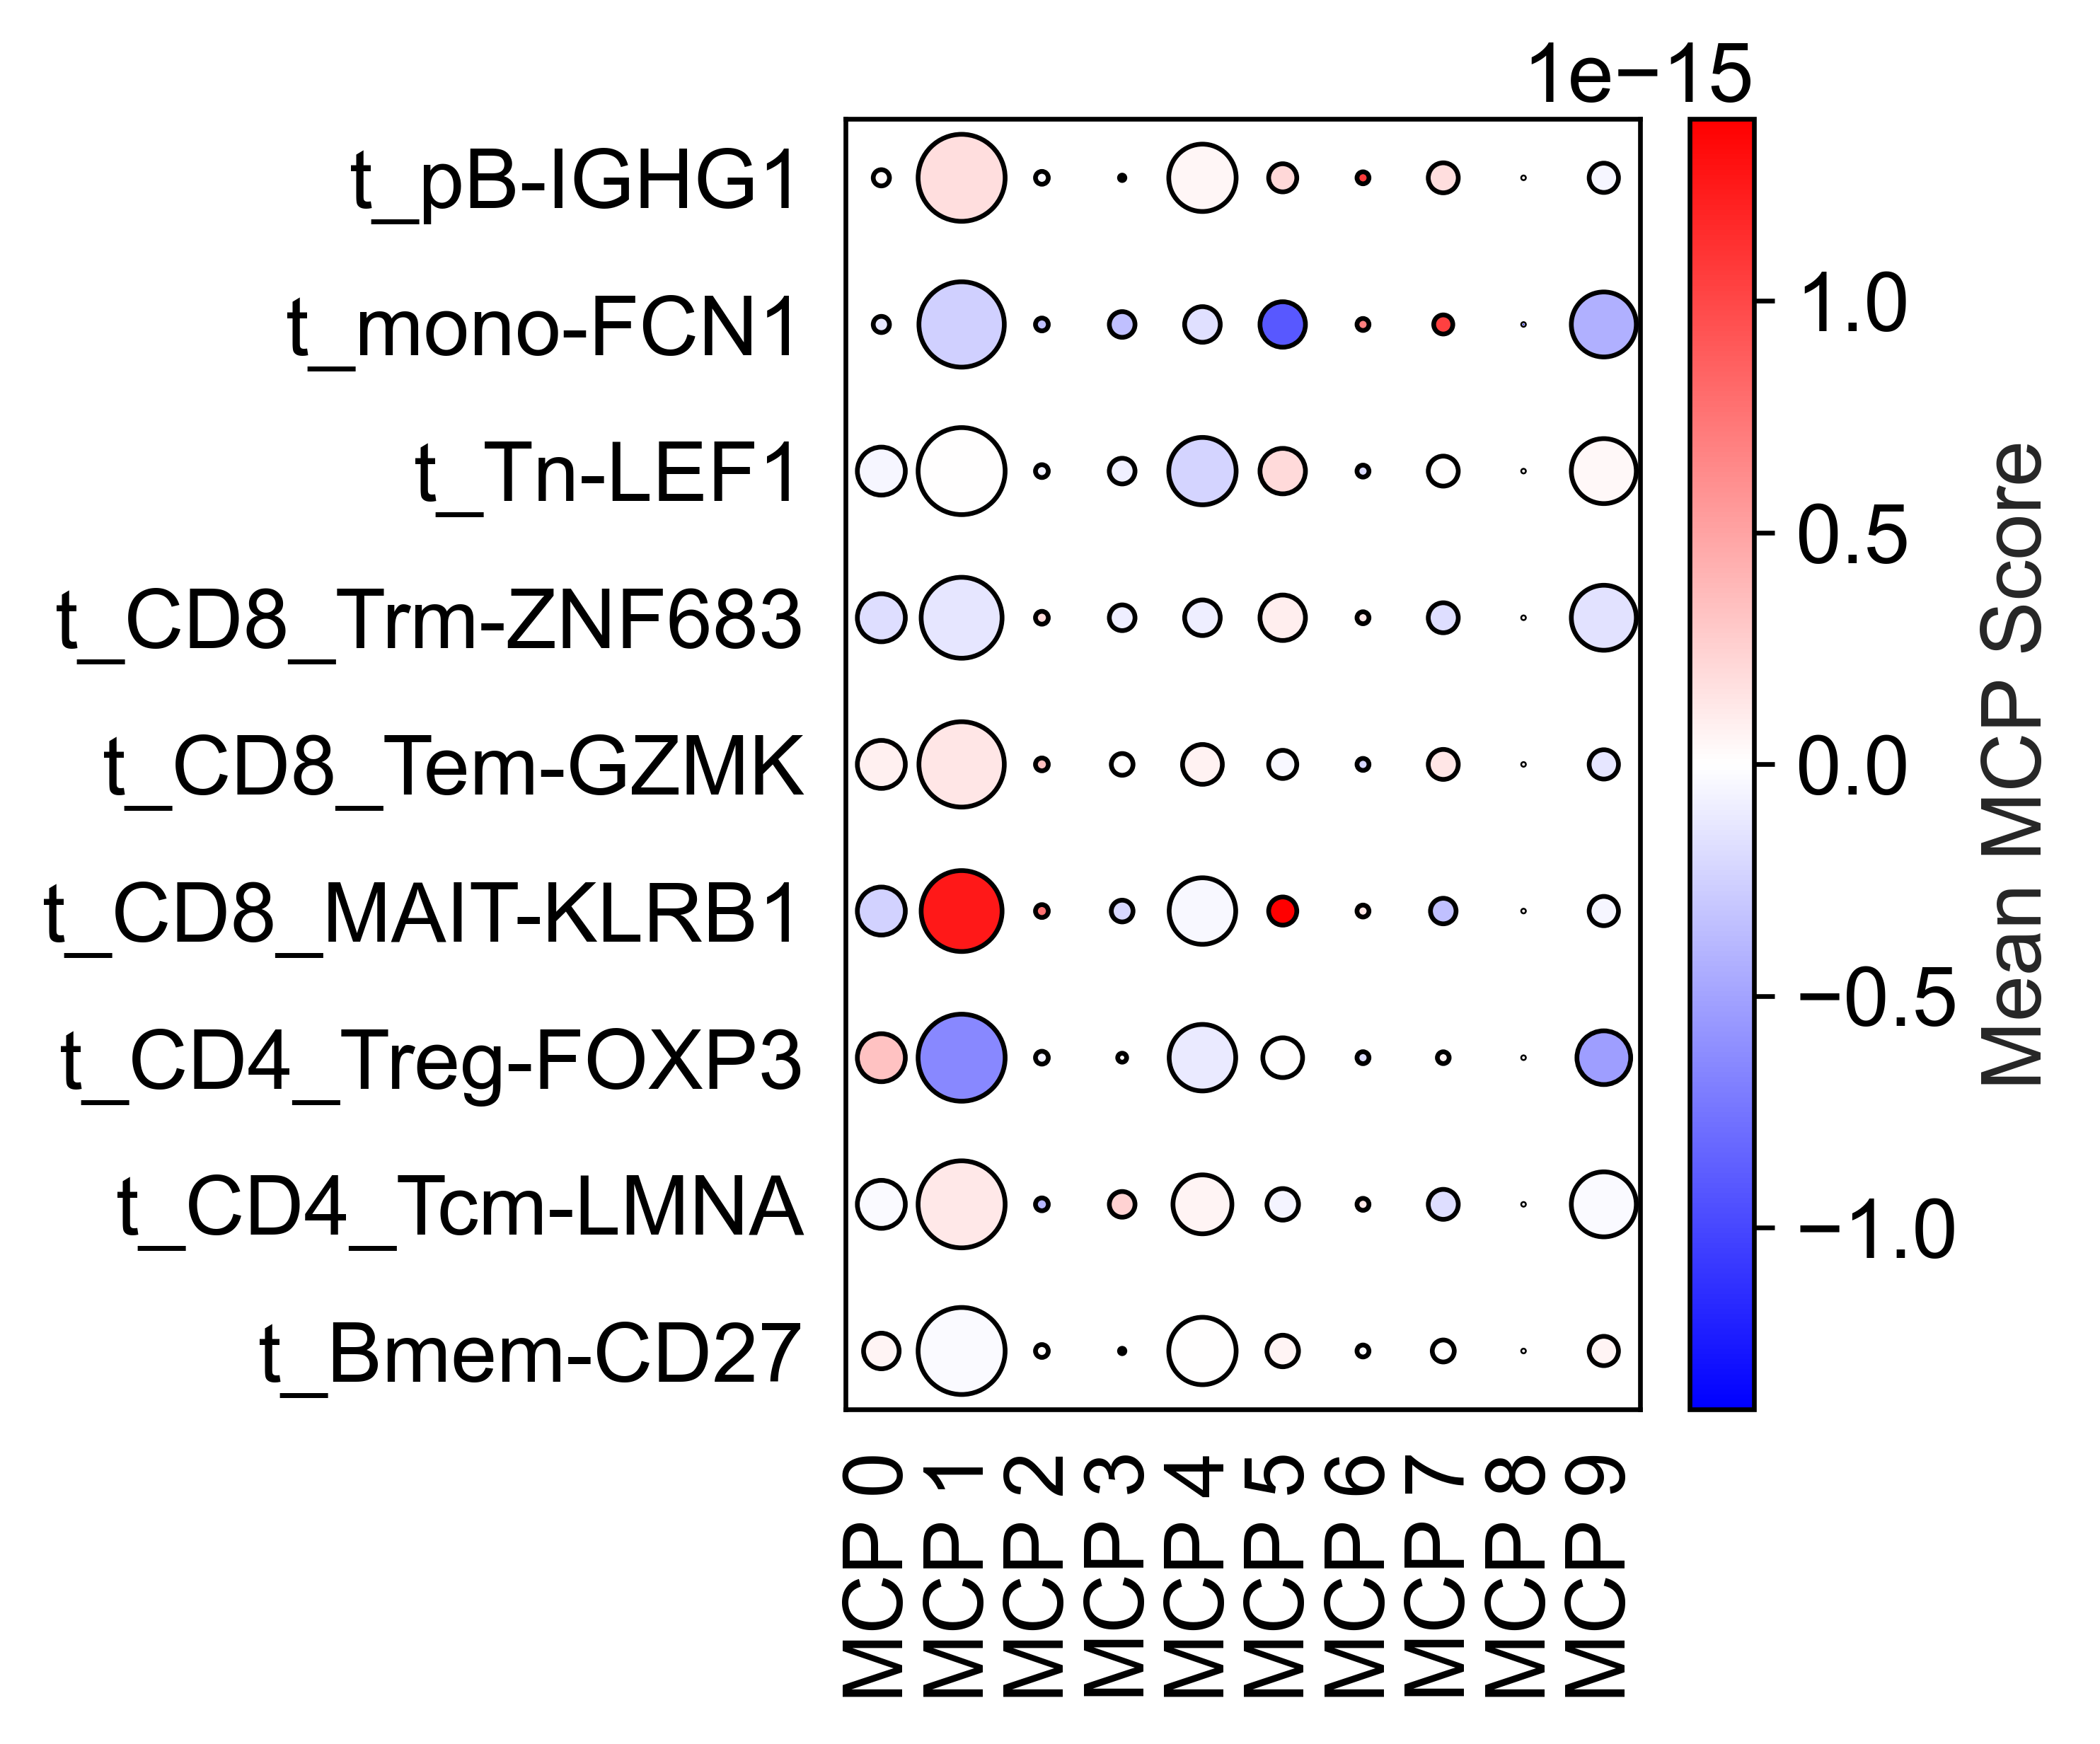

In [28]:
cell_types = associations_df.index

plot_df = {"Cell type": [], "y_pos": [], "MCP":[], "Mean MCP Score": [], "x_pos": [], "Significance": [], "-log10(p)":[]}

for mcp_nr in range(10):
    for ct_nr, cell_type in enumerate(cell_types):
        plot_df["Cell type"].append(cell_type)
        plot_df["y_pos"].append(ct_nr)
        plot_df["MCP"].append(f"MCP {mcp_nr}")
        plot_df["Mean MCP Score"].append(adata[adata.obs["Cluster"] == cell_type].obs[f"mcp_{mcp_nr}"].mean())
        plot_df["x_pos"].append(mcp_nr)
        plot_df["Significance"].append(associations_df.loc[cell_type, f"mcp_{mcp_nr}"] < 0.1)
        plot_df["-log10(p)"].append(-1 * np.log10(associations_df.loc[cell_type, f"mcp_{mcp_nr}"]))

plot_df = pd.DataFrame(plot_df)

plt.figure(figsize=(3, 4))

max = abs(plot_df["Mean MCP Score"]).max()
plt.scatter(plot_df["x_pos"],
            plot_df["y_pos"],
            s=plot_df["-log10(p)"]*220,
            c=plot_df["Mean MCP Score"],
            cmap="bwr",
            vmin=-max,
            vmax=max,
            edgecolors='black',
            linewidth=0.8,
            )
plt.xticks(range(10), [f"MCP {i}" for i in range(10)], rotation=90)
plt.yticks(range(len(cell_types)), cell_types)
plt.grid(False)

cbar = plt.colorbar()
cbar.set_label("Mean MCP Score")
plt.savefig("figures/mcp_dotplot.png", bbox_inches="tight")

## Pairplot for MCP 1

In [39]:
cell_types = ["t_Bmem-CD27", "t_CD4_Tcm-LMNA", "t_CD4_Treg-FOXP3", "t_Tn-LEF1", "t_pB-IGHG1"]

plot_df = {cell_type: [] for cell_type in cell_types}
plot_df["Efficacy"] = []

for sample in adata.obs["Sample"].unique():
    efficacy = adata[adata.obs["Sample"] == sample].obs["Efficacy"].unique()[0]
    plot_df["Efficacy"].append(efficacy)
    for cell_type in cell_types:
        plot_df[cell_type].append(adata[(adata.obs["Sample"] == sample) & (adata.obs["Cluster"] == cell_type)].obs["mcp_1"].mean())
        
plot_df = pd.DataFrame(plot_df)

sns.pairplot(plot_df, hue="Efficacy", corner=True)
plt.savefig("figures/mcp_pairplot.png", bbox_inches="tight")